## Архитектура систем классификации

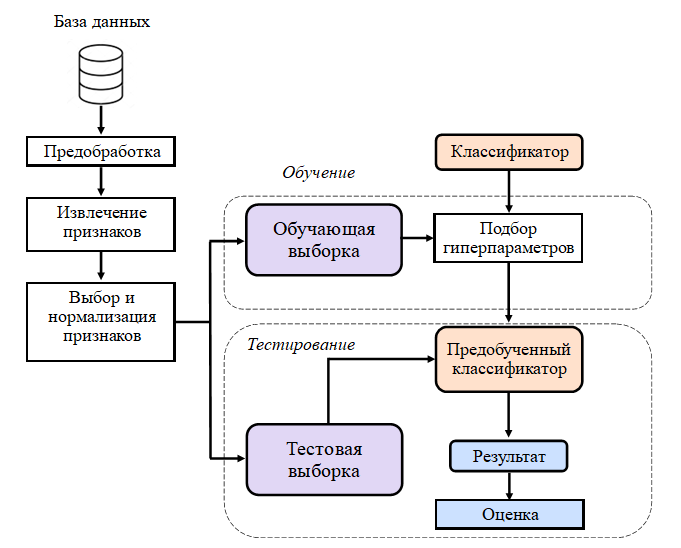

## Обучающая и тестовая выборка

*Обучающая выборка* необходима для того, чтобы обучить классификатор предсказывать сентимент в текстах. 
*Тестовая выборка* нужна для того, чтобы определить насколько хорошо научился наш классификатор и получить количественную оценку (точность) работы классификатора

In [ ]:
#загружу набор данных для примера
from sklearn.datasets import load_iris 
import numpy as np
X = load_iris().data 
Y = load_iris().target
print(X[0])
print(np.unique(Y))

[5.1 3.5 1.4 0.2]
[0 1 2]


Разделение на обучающую выборку происходит в соотношении 80% на 20% или 70% на 30%

In [ ]:
#разделение данных на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
#разделением наш корпус данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2,
    shuffle = True, 
    random_state=42, 
    stratify = None)

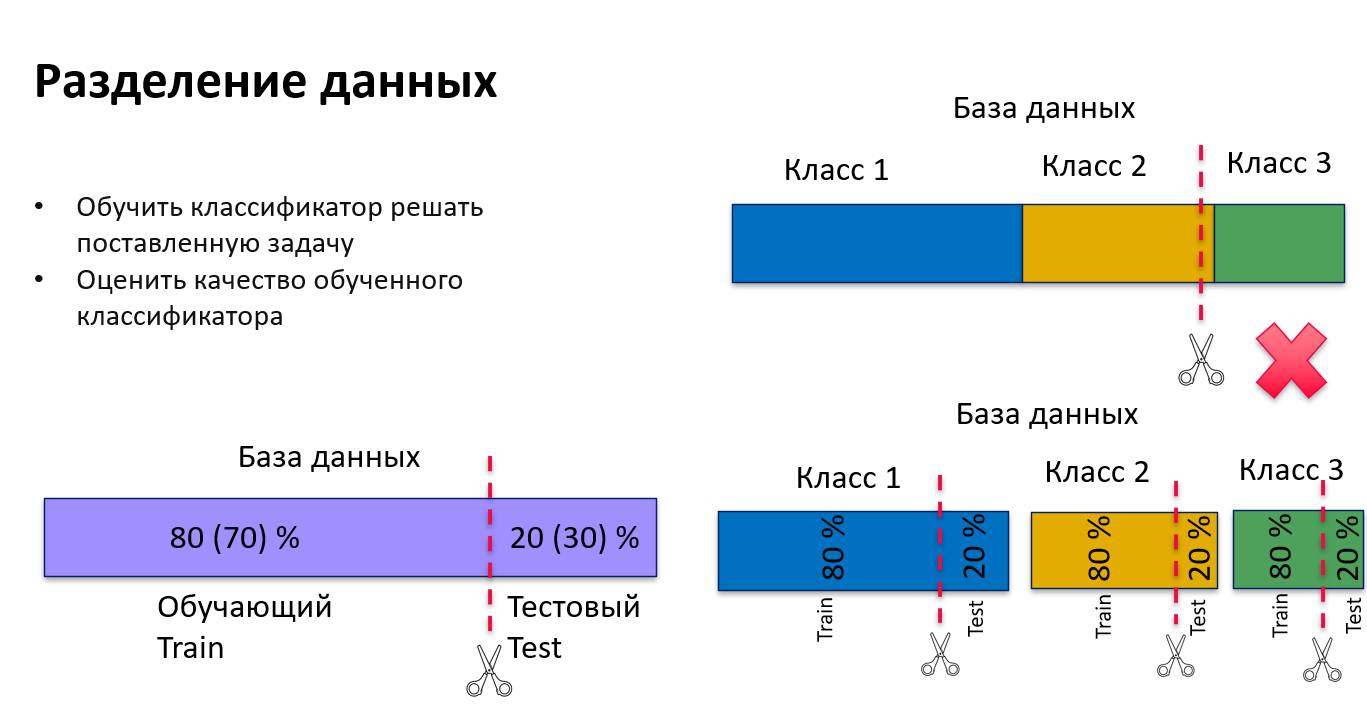

In [ ]:
print(len(X_train))
print(len(X_test))

120
30


## Классификация



*   Логистическая регрессия
*   Метод опорных векторов
*   Деревья решений
*   Случайный лес
*   K-ближайших соседей
*   Наивный Байес







### Логистическая регрессия

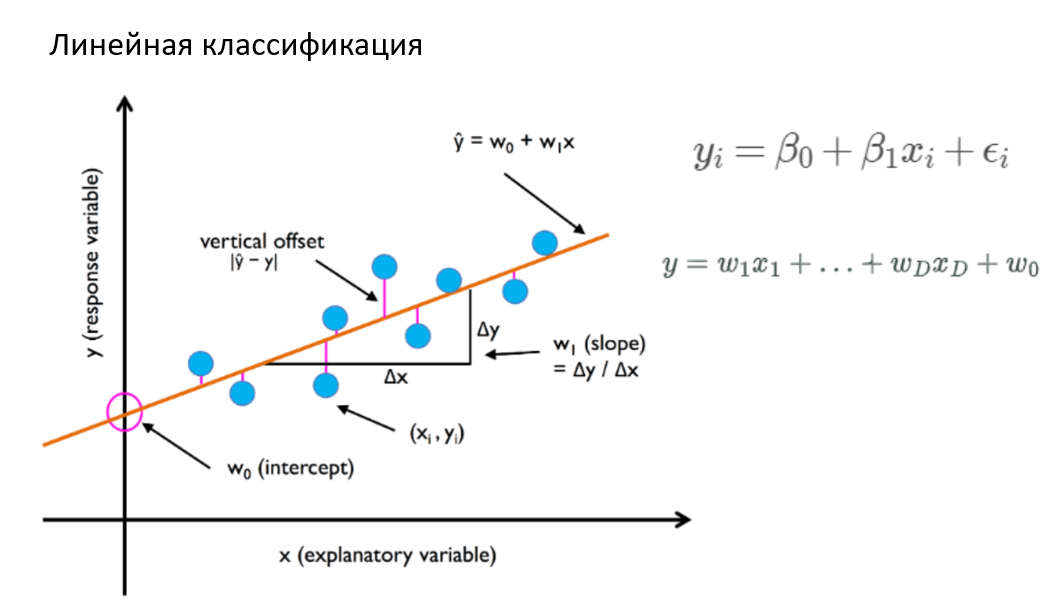

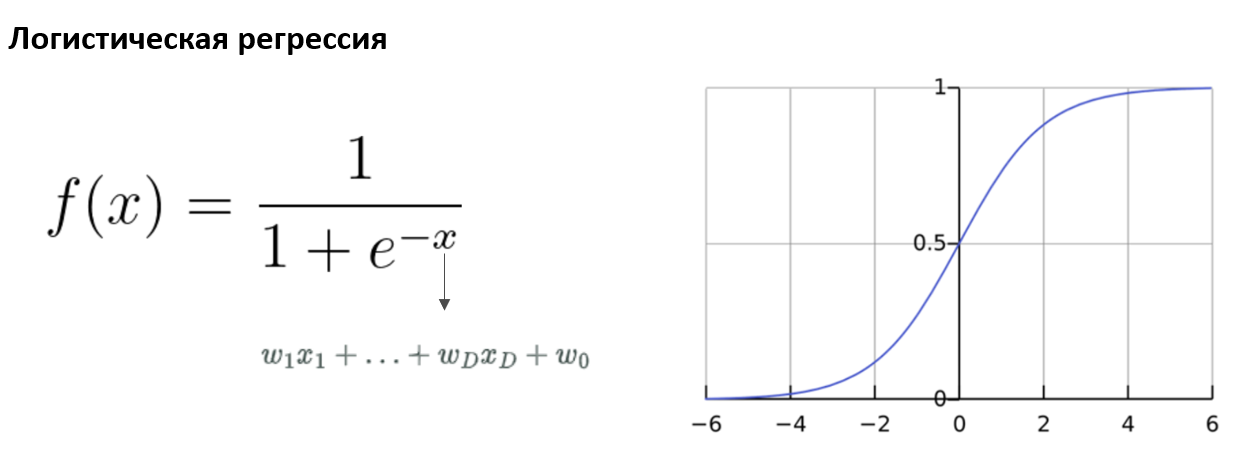

Подробная математика логистической регрессии
https://www.dmitrymakarov.ru/opt/logistic-regression-05/#0-binarnaya-logisticheskaya-regressiya


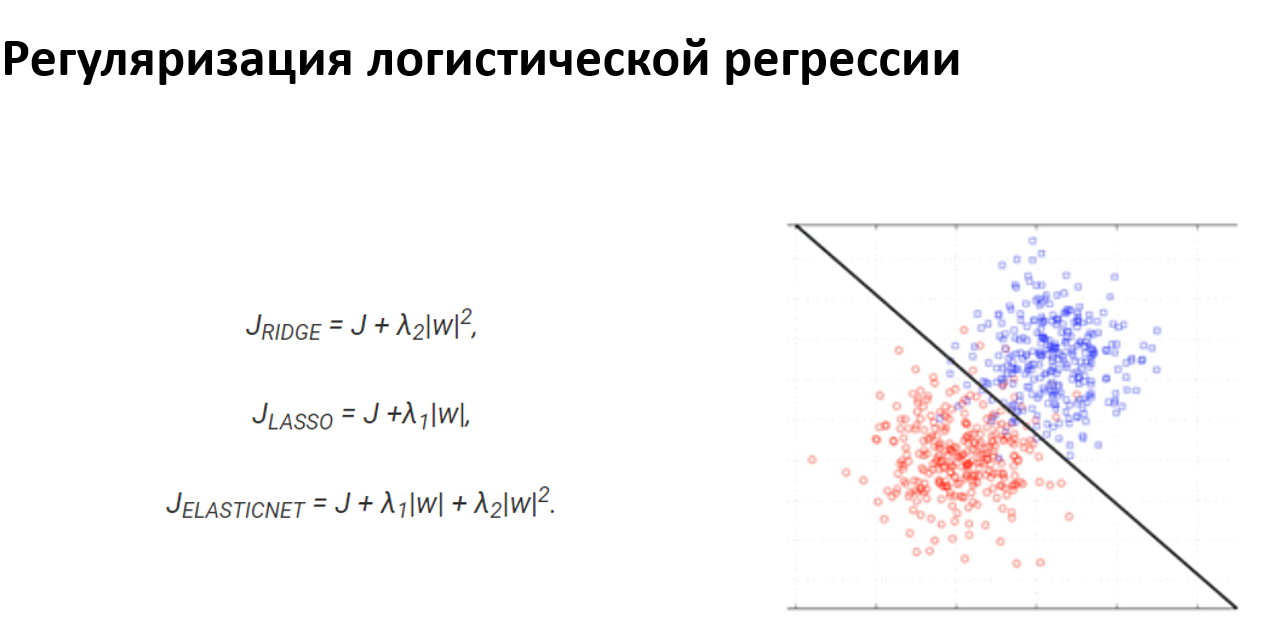

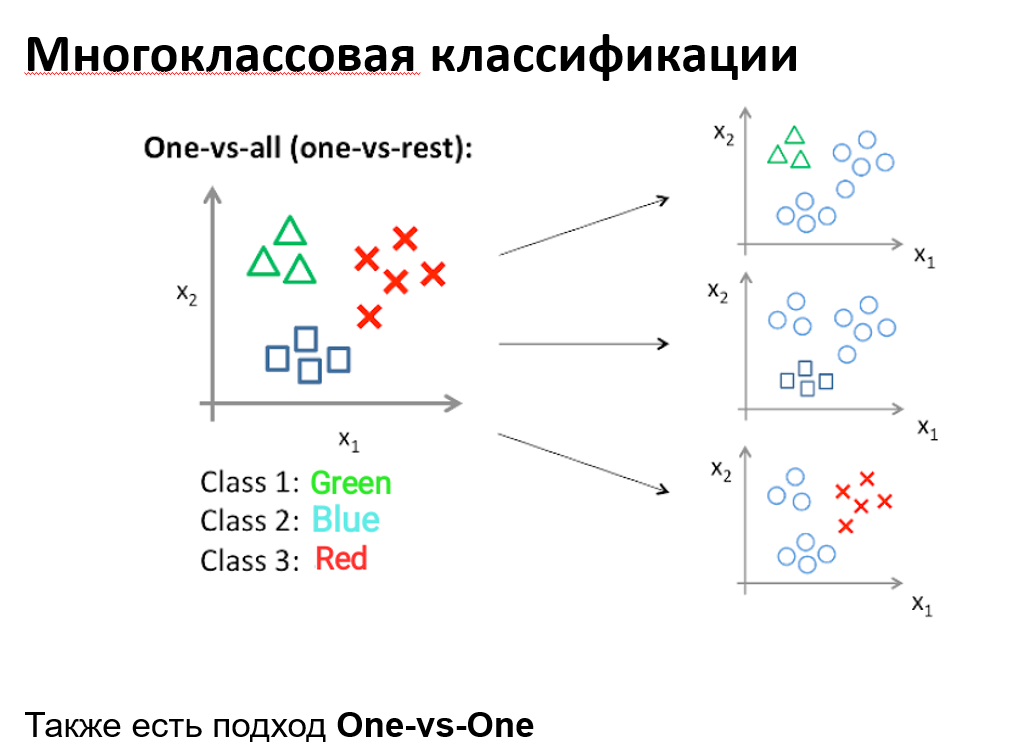

## Логистическая регрессия в Python

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#классификатор
clf = LogisticRegression(
        penalty = 'l2', #{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 100, #int, default=100
        n_jobs = -1, #int, default=None
)

In [ ]:
#предобученный классификатор
clf_pretrained = clf.fit(X_train, y_train)

In [ ]:
clf_pretrained 

LogisticRegression(C=0.2, class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
#результат предсказания
y_predict = clf_pretrained.predict(X_test)

In [ ]:
#результат предсказания
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
#исходные лейблы
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

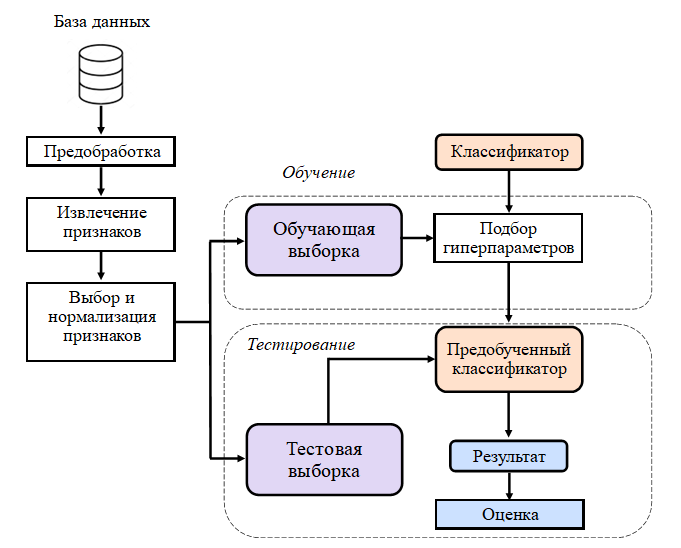

### Оценка

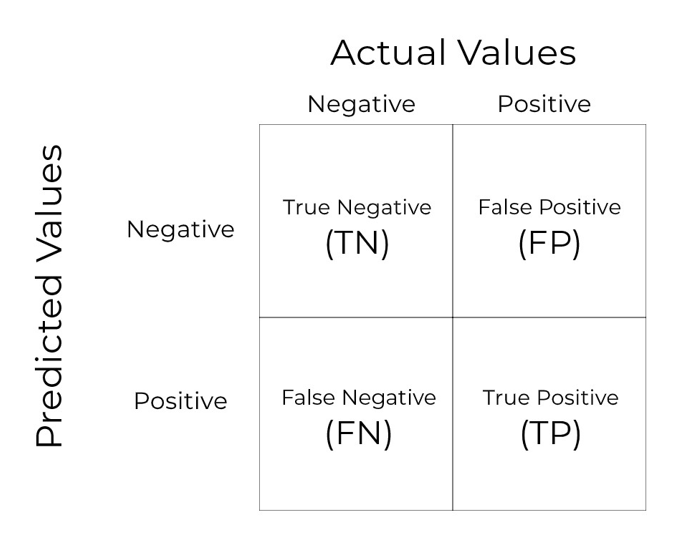

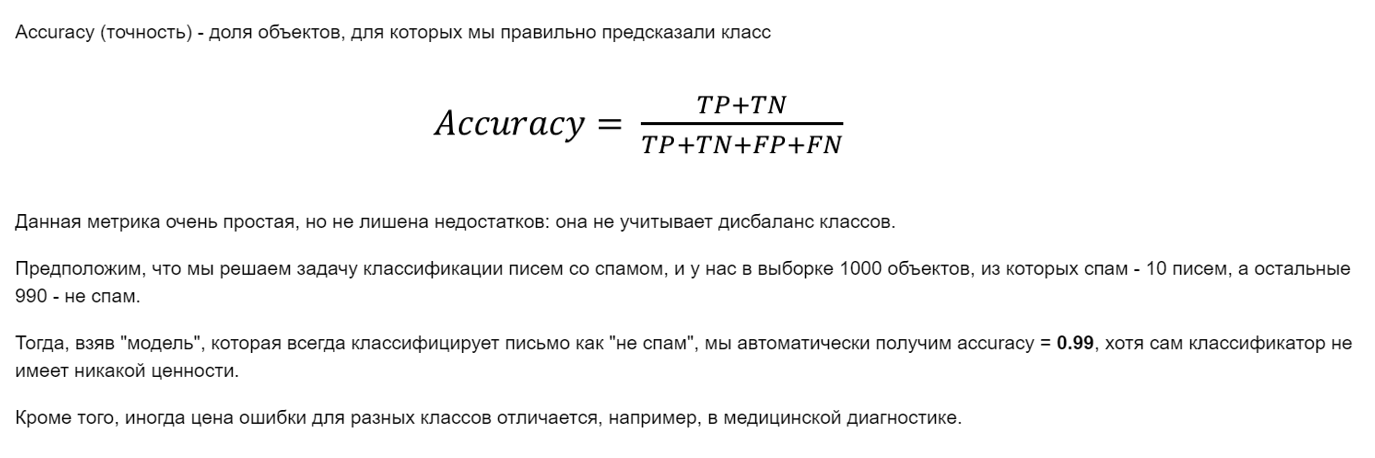

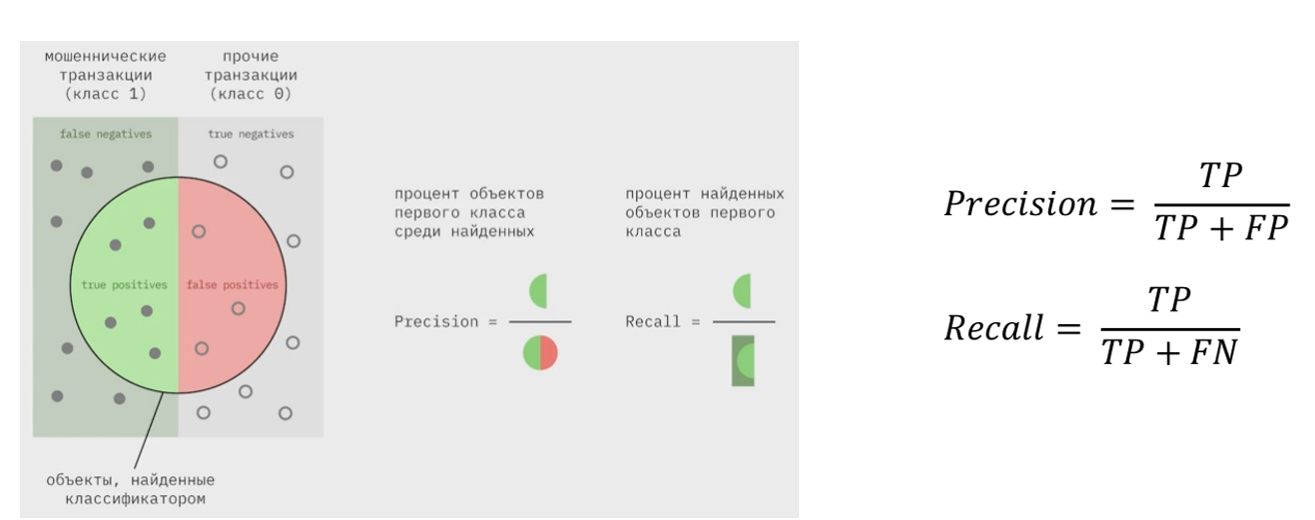

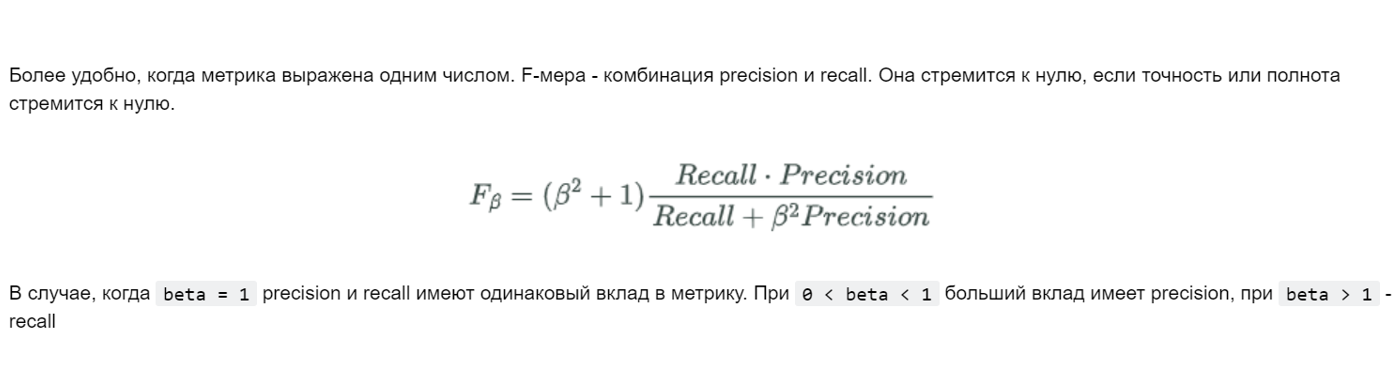

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score

In [ ]:
accuracy_score(y_test, y_predict)

1.0

In [ ]:
precision_score(y_test, y_predict, average='macro')

1.0

In [ ]:
recall_score(y_test, y_predict, average='macro')

1.0

In [ ]:
f1_score(y_test, y_predict, average='macro')

1.0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_predict, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    1.0000    1.0000         9
           2     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30



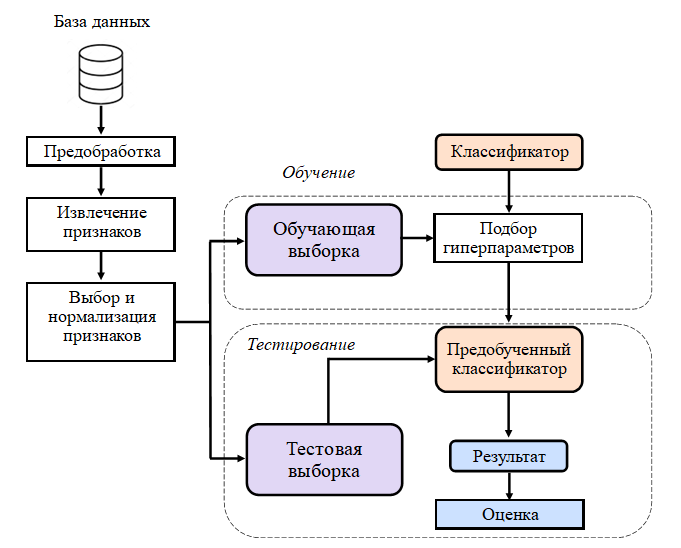

### Метод опорных векторов

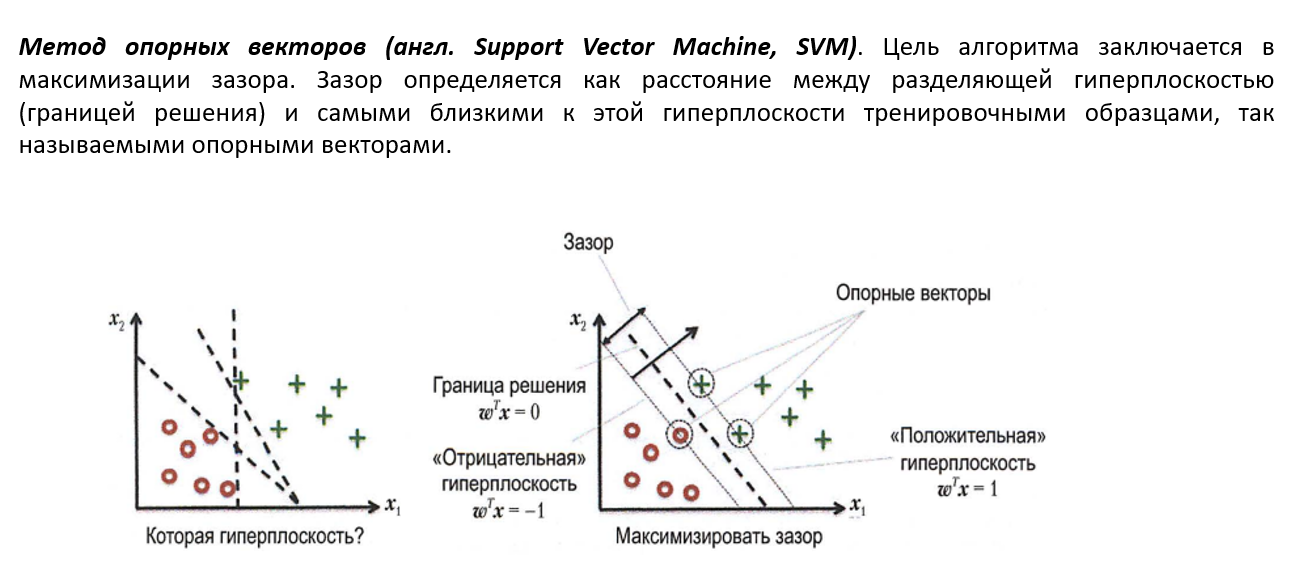

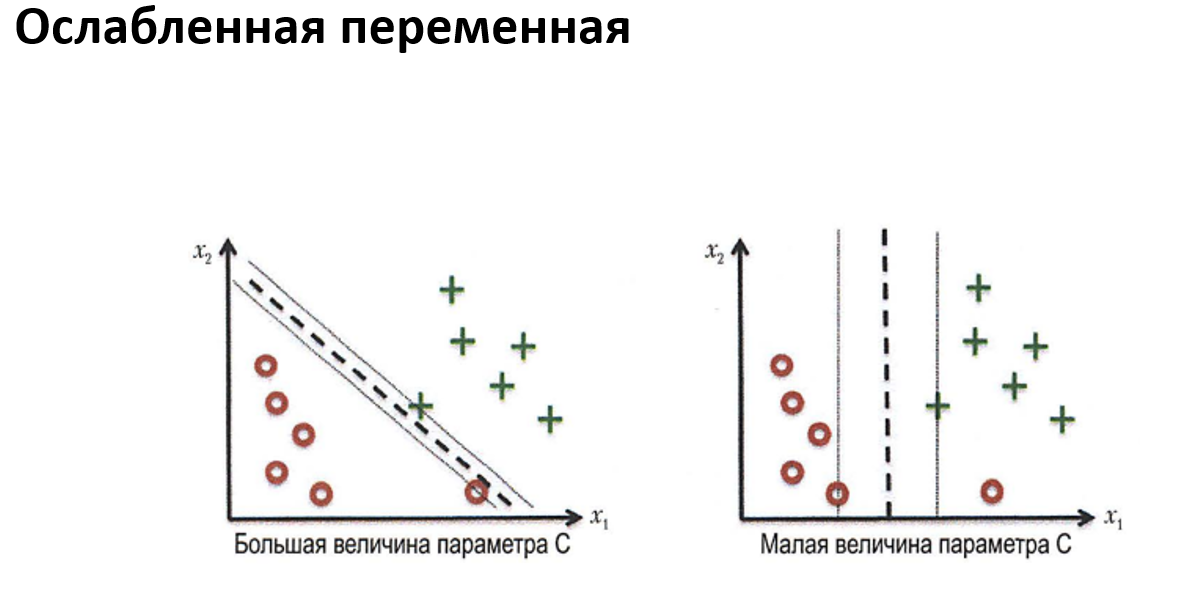

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf_lsvc = LinearSVC(
        penalty = 'l2', #{‘l1’, ‘l2’}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 2000 #int, default=1000
)

In [ ]:
clf_lsvc = clf_lsvc.fit(X_train, y_train)
y_predict_lsvc = clf_lsvc.predict(X_test)

## Деревья решений

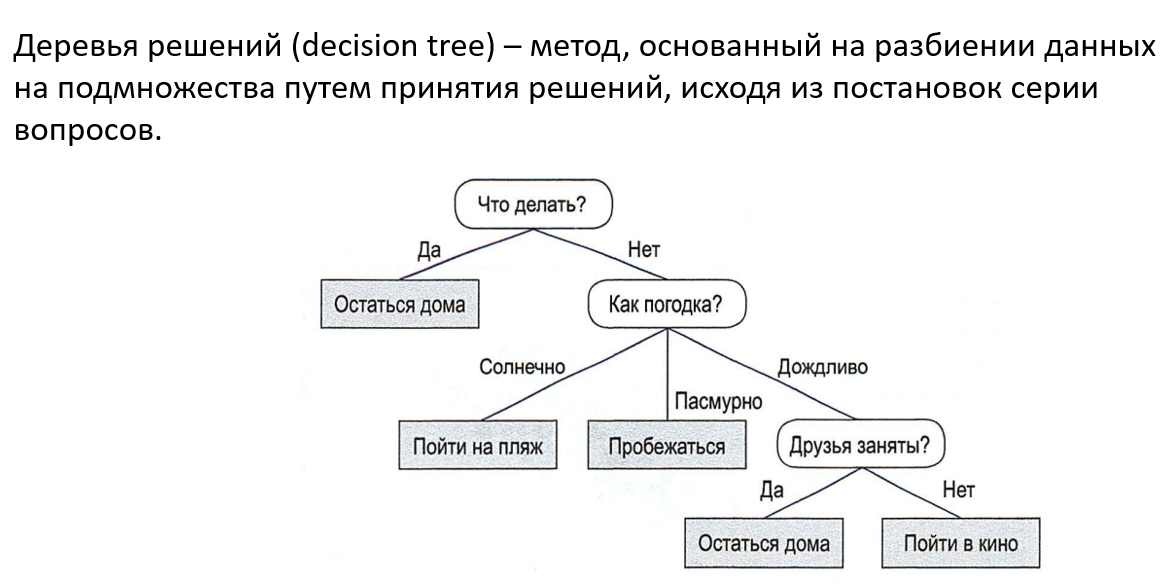

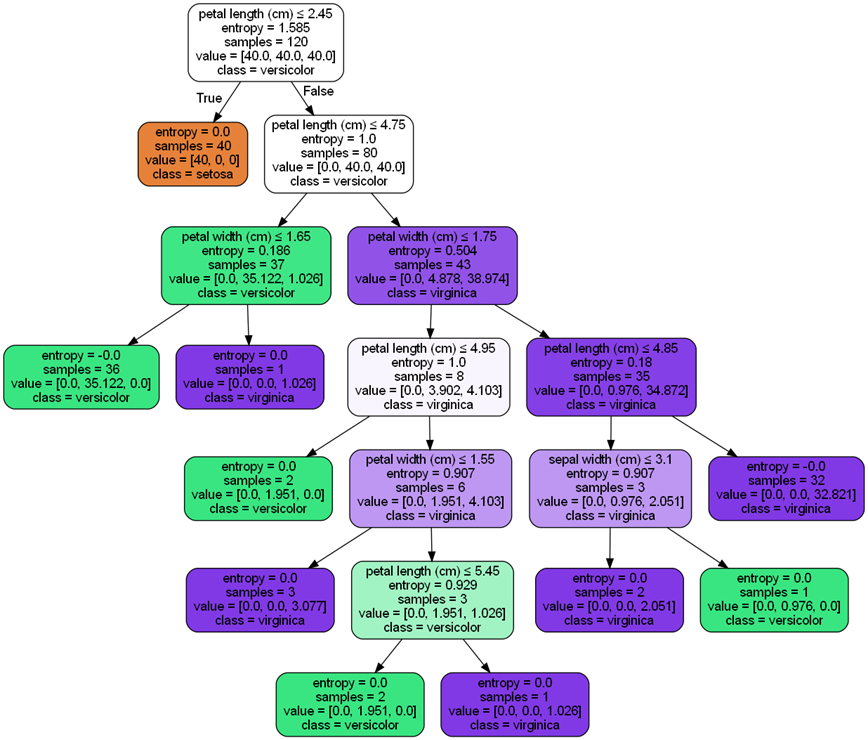

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_dt =  DecisionTreeClassifier(
        criterion = 'entropy', #{“gini”, “entropy”, “log_loss”}, default=”gini”
        splitter = 'best', #{“best”, “random”}, default=”best”
        max_depth = 200, #int, default=None
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42
)

In [ ]:
clf_dt = clf_dt.fit(X_train, y_train)
y_predict_dt = clf_dt.predict(X_test)

### Случайный лес

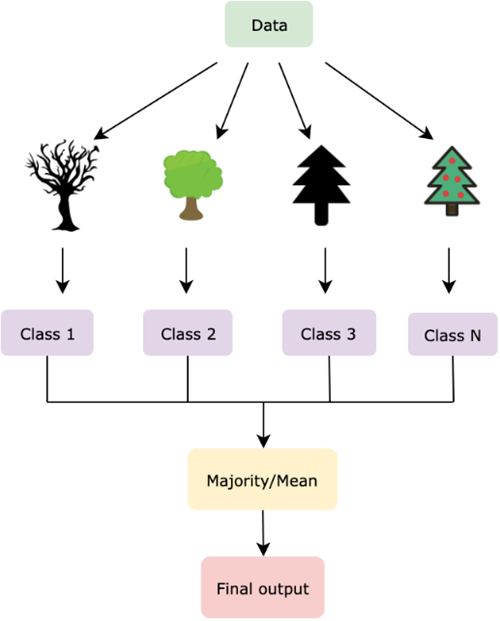

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf =  RandomForestClassifier(
        n_estimators = 200, #int, default=100
        criterion = 'gini', #{“gini”, “entropy”, “log_loss”}, default=”gini”
        max_depth = 200, #int, default=None
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42
)

In [ ]:
clf_rf = clf_rf.fit(X_train, y_train)
y_predict_rf = clf_rf.predict(X_test)

## K-ближайших соседей

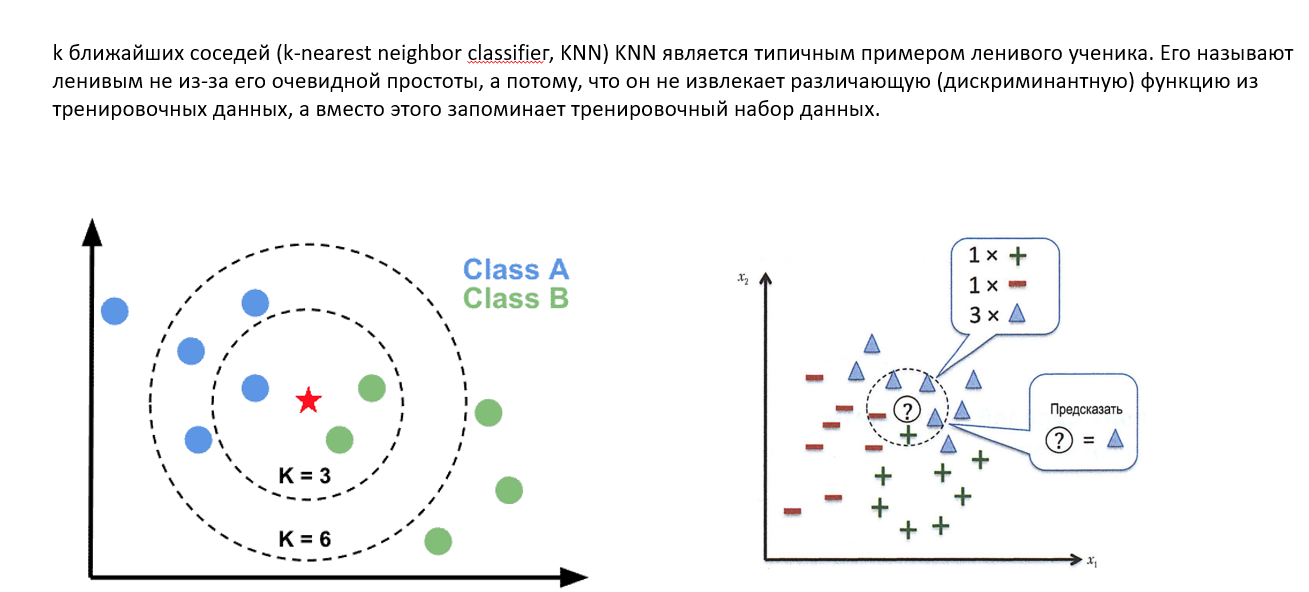

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf_KNN = KNeighborsClassifier(
        n_neighbors = 3, #int, default=5
        weights = 'distance', #{‘uniform’, ‘distance’}, callable or None, default=’uniform’
        metric = 'euclidean', #str or callable, default=’minkowski’
)

In [ ]:
clf_KNN = clf_KNN.fit(X_train, y_train)
y_predict_KNN = clf_KNN.predict(X_test)

## Наивный Баейес

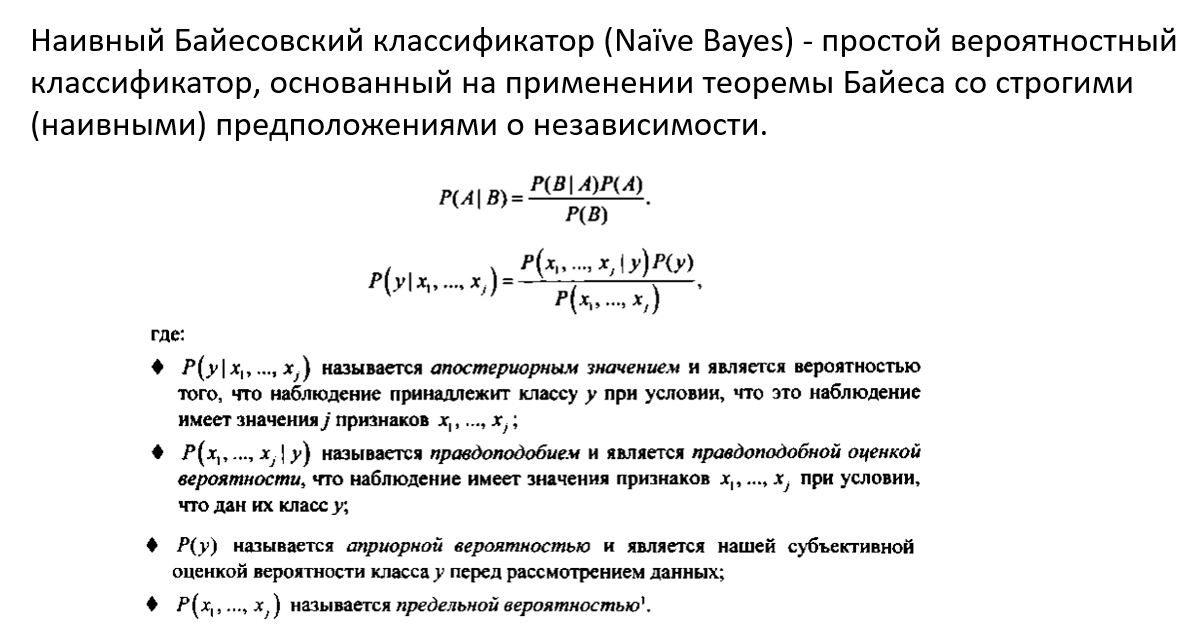

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf_nb = MultinomialNB(
        alpha = 1.1 #float or array-like of shape (n_features,), default=1.0
)

In [ ]:
clf_nb = clf_nb.fit(X_train, y_train)
y_predict_nb = clf_nb.predict(X_test)

# Домашнее задание

1. Взять 1 любой полученный список векторов из предыдущей лабы
2. Разделить данные на обучающее и тестовое множество
3. Обучить минимум 3 классификатора
4. Оценить их работу с помощью метрик
5. Выбрать наилучший классификатор

# Обратная связь

https://docs.google.com/forms/d/e/1FAIpQLSdH-mFF841-BRDeBvPhBluBOWDHQ6gKRbimLJ3tUZv_8LZo9w/viewform 